In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("../Data/data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
train_df=df.copy()

Y=df["churn"]
X=df.drop(columns={"churn","id"})
print(Y.shape)
print(X.shape)

(14606,)
(14606, 61)


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10954, 61)
(3652, 61)
(10954,)
(3652,)


In [7]:
model=RandomForestClassifier(criterion="gini")
model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred=model.predict(X_test)

Confusion matrix:


| Metric              | Usefulness                                                        |
| ------------------- | ----------------------------------------------------------------- |
| True Positive (TP)  | Correctly predicted churn                                         |
| True Negative (TN)  | Correctly predicted no-churn                                      |
| False Positive (FP) | Predicted churn, but didn’t churn (might waste retention efforts) |
| False Negative (FN) | Predicted no-churn, but churned (worst case: lost customer)       |


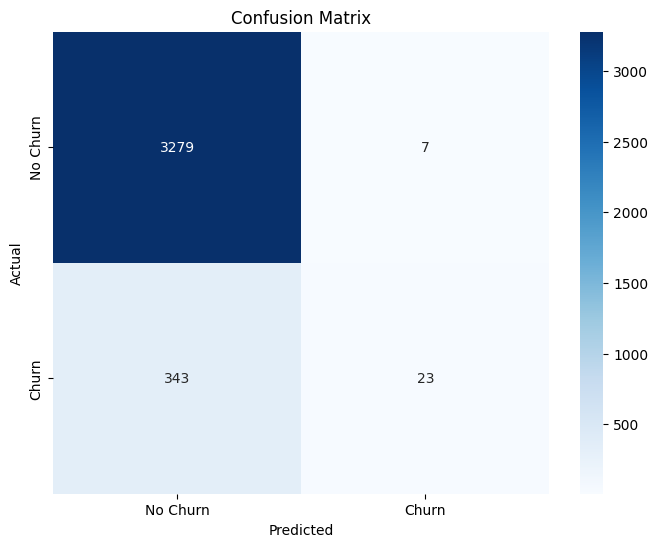

In [10]:
confusion_matrix=metrics.confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix,annot=True,fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy score of this model is 90.4% which tell us that 90% of the time my test data predicts right churn.
accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)
Out of all clients predicted to churn, how many actually did?

recall = TP / (TP + FN)
Out of all actual churners, how many did we catch?

F1 = 2 * (precision * recall) / (precision + recall)
Balances precision and recall, Useful when class imbalance is present

In [11]:
print("Accuracy score: ",metrics.accuracy_score(Y_test,y_pred))
print("Precision: ",metrics.precision_score(Y_test,y_pred))
print("Recall: ",metrics.recall_score(Y_test,y_pred))
print("F-1 score: ",metrics.f1_score(Y_test,y_pred))


Accuracy score:  0.9041621029572837
Precision:  0.7666666666666667
Recall:  0.06284153005464481
F-1 score:  0.11616161616161616


Recall is extremely low (6.28%)
This means your model is missing ~94% of the customers who actually churned.

Precision is relatively high (76.7%)
Out of the customers predicted to churn, ~77% actually did churn — this is decent.

F1-Score is low (11.6%)
This confirms that the model is poorly balanced between precision and recall.

### Final Verdict: Not Satisfactory
Despite the high accuracy, the model's real performance on churn detection is poor, because:

It misses nearly all actual churners (low recall)

Fails to deliver a usable signal for customer retention

Precision is good only because the model is very conservative — it predicts "churn" in very few cases